# Principal Component Analysis with Cancer Data

In [104]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [105]:
df= pd.read_csv('breast-cancer-wisconsin-data.csv')
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [106]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [107]:
print(df.dtypes)




ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object


In [108]:
print(df.shape)

(699, 11)


In [109]:
print(df.describe())

                 ID  ClumpThickness   Cell Size  Cell Shape  \
count  6.990000e+02      699.000000  699.000000  699.000000   
mean   1.071704e+06        4.417740    3.134478    3.207439   
std    6.170957e+05        2.815741    3.051459    2.971913   
min    6.163400e+04        1.000000    1.000000    1.000000   
25%    8.706885e+05        2.000000    1.000000    1.000000   
50%    1.171710e+06        4.000000    1.000000    1.000000   
75%    1.238298e+06        6.000000    5.000000    5.000000   
max    1.345435e+07       10.000000   10.000000   10.000000   

       Marginal Adhesion  Single Epithelial Cell Size  Normal Nucleoli  \
count         699.000000                   699.000000       699.000000   
mean            2.806867                     3.216023         3.437768   
std             2.855379                     2.214300         2.438364   
min             1.000000                     1.000000         1.000000   
25%             1.000000                     2.000000         

In [110]:
df =df.drop(columns= "ID", axis=1)
df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [111]:
print(df.shape)

(699, 10)


In [112]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
None


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [113]:
# We could see "?" values in column, this should be removed from data set
print(df.isnull().sum())


# Check for missing value in any other column

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64


In [114]:
df.isin(['?']).sum()

ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [115]:
df.shape

(699, 10)

In [116]:
df['Bare Nuclei'].isin(['?']).sum()

16

In [117]:
# No missing values found. So let us try to remove ? from bare nuclei column
df[df['Bare Nuclei']== "?"] = df['Bare Nuclei'].describe(include=all).top
# Get count of rows having ?


In [118]:
df.isin(['?']).sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [119]:
#pd.to_numeric(df['Bare Nuclei']).head()

In [120]:
#cat_col = df.select_dtypes(include=np.number).columns
#df['Bare Nuclei'].dtypes

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null object
Cell Size                      699 non-null object
Cell Shape                     699 non-null object
Marginal Adhesion              699 non-null object
Single Epithelial Cell Size    699 non-null object
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null object
Bland Chromatin                699 non-null object
Mitoses                        699 non-null object
Class                          699 non-null object
dtypes: object(10)
memory usage: 54.7+ KB


In [137]:
df1=df.astype(int, inplace=True)
df1.head()


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int32
Cell Size                      699 non-null int32
Cell Shape                     699 non-null int32
Marginal Adhesion              699 non-null int32
Single Epithelial Cell Size    699 non-null int32
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int32
Bland Chromatin                699 non-null int32
Mitoses                        699 non-null int32
Class                          699 non-null int32
dtypes: int32(10)
memory usage: 27.4 KB


In [140]:
df1['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [160]:
df1.drop_duplicates(keep='first',inplace = True)

In [161]:
df1.shape

(450, 10)

In [162]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [163]:
# Check for correlation of variable
df1.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.572011,0.585398,0.380790,0.432120,0.510302,0.487909,0.445604,0.295031,0.672310
Cell Size,0.572011,1.000000,0.877196,0.639181,0.690249,0.591336,0.711437,0.650888,0.403856,0.758843
Cell Shape,0.585398,0.877196,1.000000,0.613618,0.651093,0.619175,0.685327,0.651384,0.381927,0.759786
Marginal Adhesion,0.380790,0.639181,0.613618,1.000000,0.518969,0.591558,0.611402,0.510826,0.357135,0.630904
Single Epithelial Cell Size,0.432120,0.690249,0.651093,0.518969,1.000000,0.481224,0.555447,0.556671,0.434453,0.612980
Bare Nuclei,0.510302,0.591336,0.619175,0.591558,0.481224,1.000000,0.608713,0.479177,0.259321,0.760386
Normal Nucleoli,0.487909,0.711437,0.685327,0.611402,0.555447,0.608713,1.000000,0.605320,0.279312,0.707791
Bland Chromatin,0.445604,0.650888,0.651384,0.510826,0.556671,0.479177,0.605320,1.000000,0.373545,0.645550
Mitoses,0.295031,0.403856,0.381927,0.357135,0.434453,0.259321,0.279312,0.373545,1.000000,0.357451
Class,0.672310,0.758843,0.759786,0.630904,0.612980,0.760386,0.707791,0.645550,0.357451,1.000000


In [164]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\AMIT\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\AMIT\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


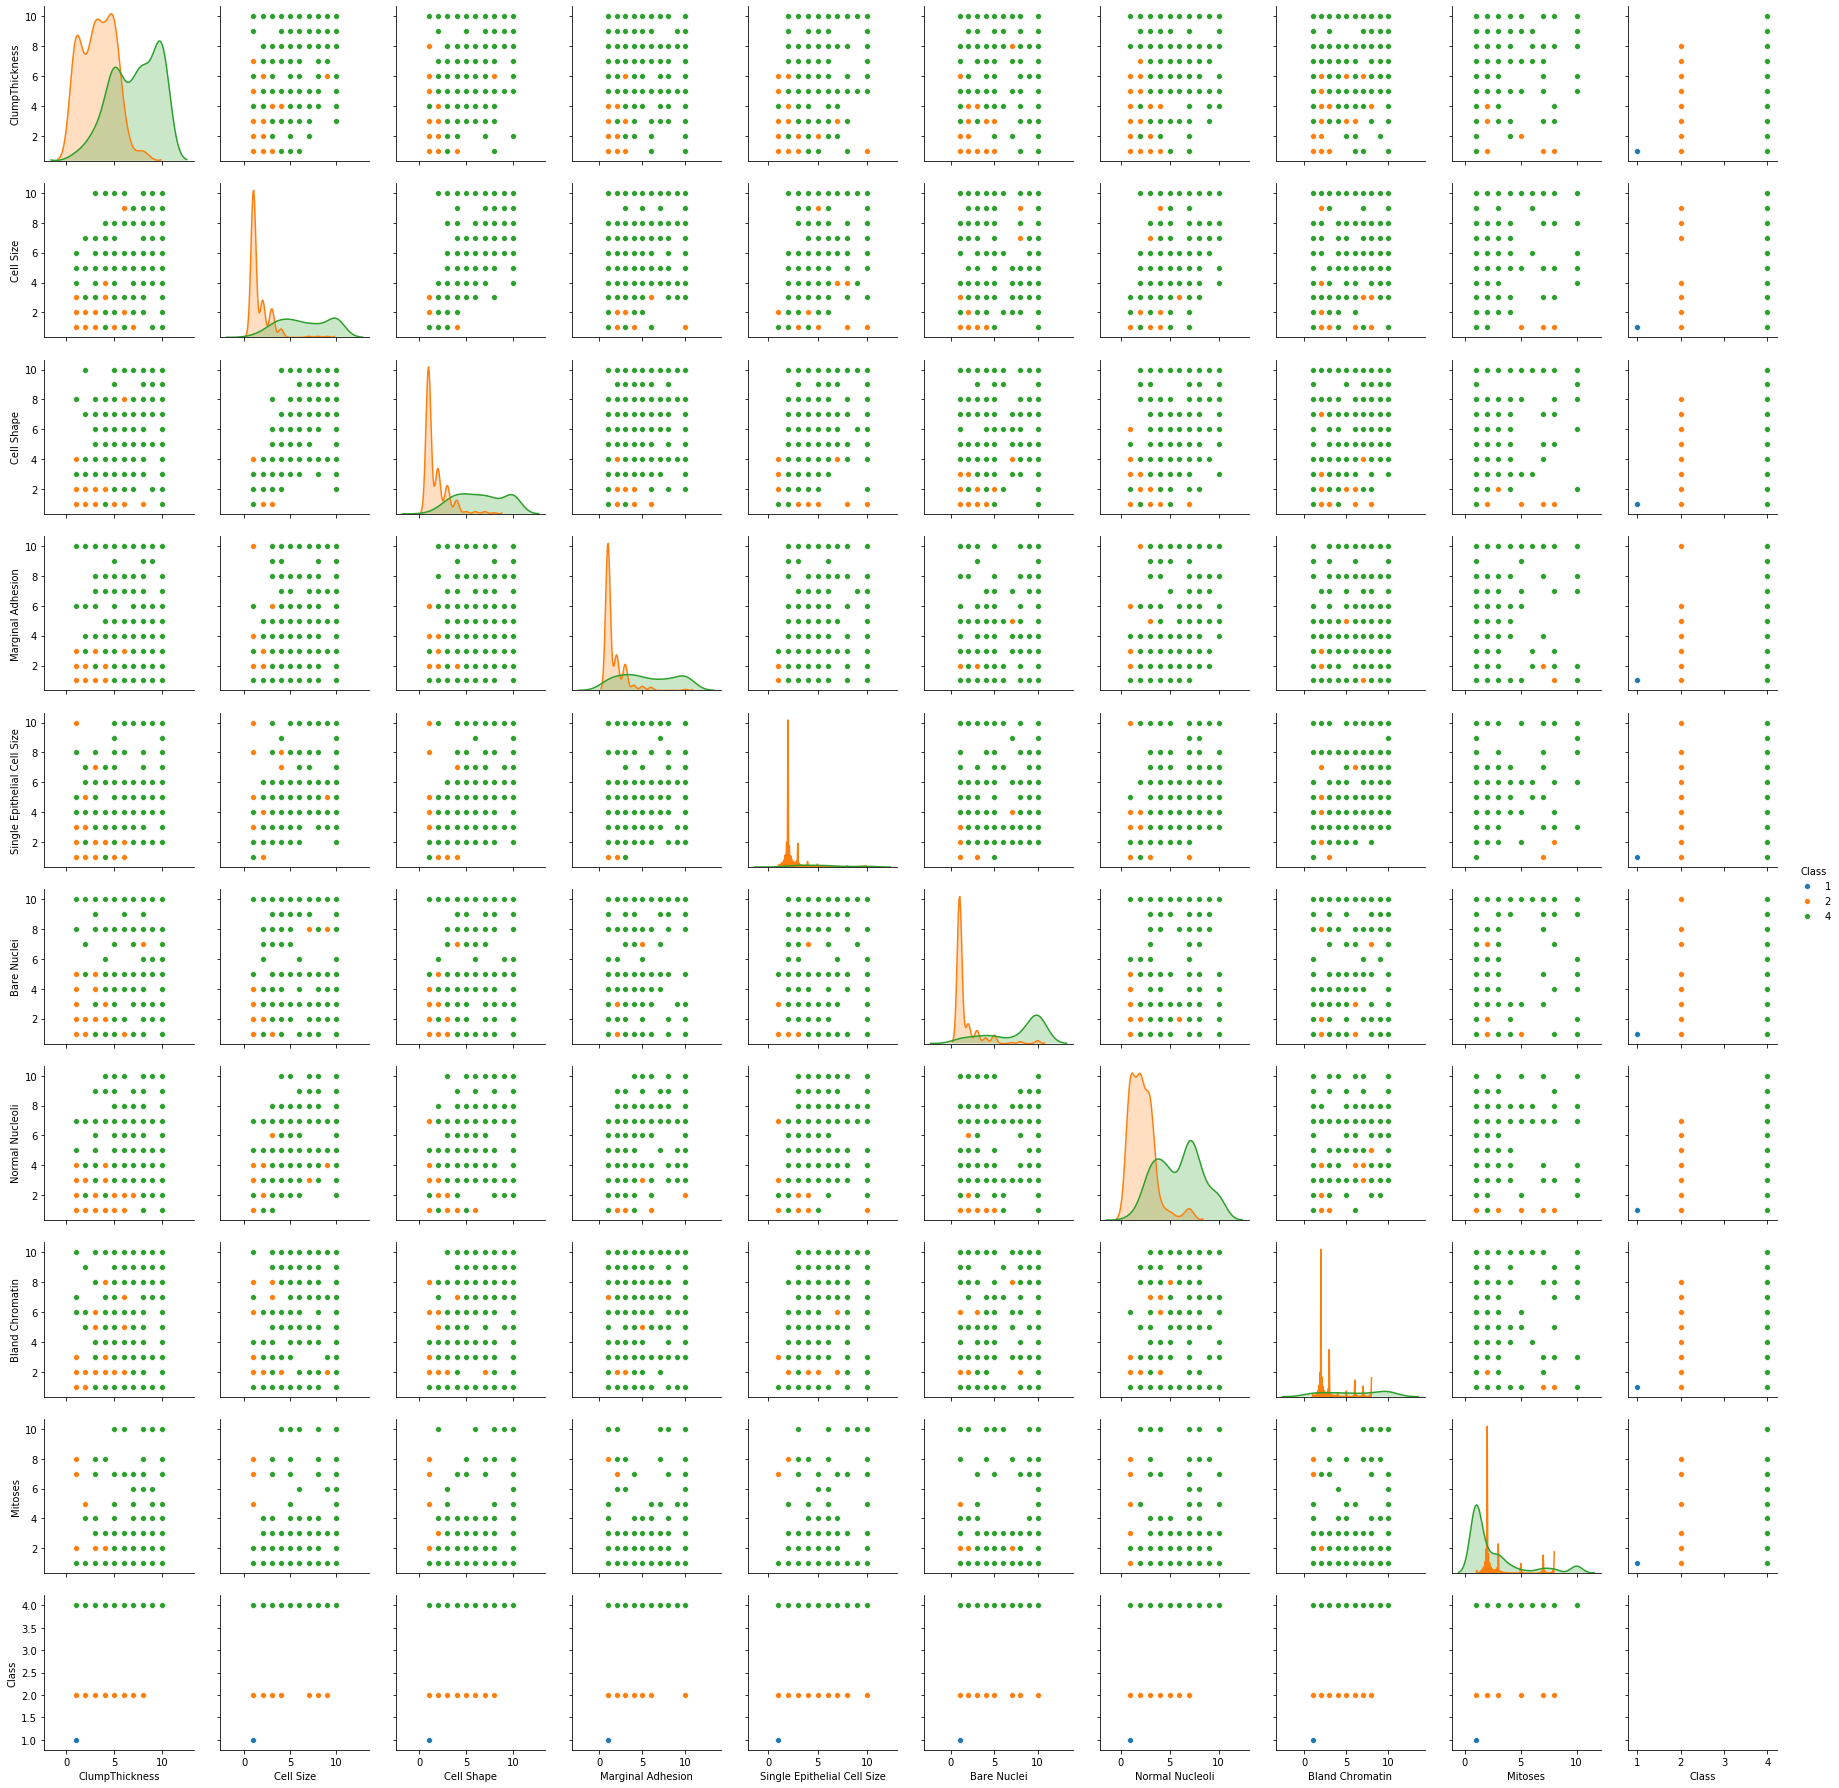

In [165]:
#Let us check for pair plots
sns.pairplot(df1, hue='Class',diag_kind='kde')

(array([  1.,   0.,   0., 213.,   0.,   0.,   0.,   0.,   0., 236.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

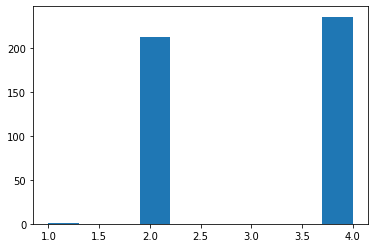

In [166]:
plt.hist(df1['Class'])

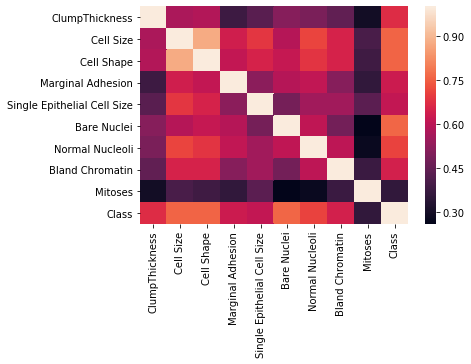

In [167]:
sns.heatmap(df1.corr())

In [168]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [132]:
# We could see most of the outliers are now removed.

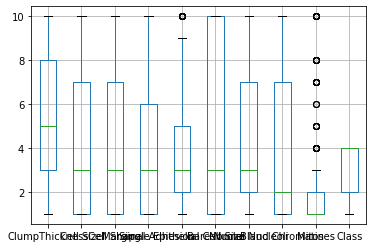

In [169]:
import matplotlib.pyplot as plt
df1.boxplot()

In [170]:
pd.crosstab(df1['Mitoses'],df1['Class'])

Class,1,2,4
Mitoses,,,
1,1,200,130
2,0,8,27
3,0,2,30
4,0,0,12
5,0,1,5
6,0,0,3
7,0,1,8
8,0,1,7
10,0,0,14


In [174]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_std = StandardScaler().fit_transform(df1)


# Q6 Create a covariance matrix for identifying Principal components

In [175]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00222717 0.57328465 0.58670222 0.38163843 0.43308234 0.51143889
  0.48899562 0.44659687 0.29568812 0.67380705]
 [0.57328465 1.00222717 0.87914941 0.64060472 0.6917861  0.59265309
  0.71302164 0.65233743 0.40475537 0.76053352]
 [0.58670222 0.87914941 1.00222717 0.61498502 0.65254296 0.62055387
  0.68685315 0.65283427 0.38277794 0.76147825]
 [0.38163843 0.64060472 0.61498502 1.00222717 0.52012464 0.59287532
  0.61276389 0.51196349 0.35793084 0.63230887]
 [0.43308234 0.6917861  0.65254296 0.52012464 1.00222717 0.48229571
  0.55668423 0.55791051 0.4354204  0.61434506]
 [0.51143889 0.59265309 0.62055387 0.59287532 0.48229571 1.00222717
  0.61006912 0.48024431 0.25989897 0.76207967]
 [0.48899562 0.71302164 0.68685315 0.61276389 0.55668423 0.61006912
  1.00222717 0.60666811 0.27993405 0.70936703]
 [0.44659687 0.65233743 0.65283427 0.51196349 0.55791051 0.48024431
  0.60666811 1.00222717 0.37437657 0.6469878 ]
 [0.29568812 0.40475537 0.38277794 0.35793084 0.4354204  0

# Q7 Identify eigen values and eigen vector

In [134]:
# Step 2- Get eigen values and eigen vector

In [176]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [177]:
print('Eigen Vectors \n%s', eig_vecs)


Eigen Vectors 
%s [[-0.27903678 -0.1751524   0.79713703 -0.02435337 -0.22253307  0.03632962
  -0.29853172 -0.22609467 -0.25361841  0.00604079]
 [-0.36322654  0.01885273 -0.06579458 -0.73809191  0.02494907  0.23596799
   0.36329461  0.12864533 -0.27506665  0.19520463]
 [-0.35988453 -0.02776285 -0.01048288  0.64859507 -0.16749495  0.21959931
   0.53511248  0.11448346 -0.23023046  0.14209358]
 [-0.30537409 -0.01392302 -0.44536009  0.04126691 -0.02063811 -0.46458008
  -0.17250168 -0.50492151 -0.45297733  0.01877879]
 [-0.30836833  0.2662266  -0.13491698  0.0643313  -0.04901515  0.29308471
  -0.35590469 -0.19144719  0.41461748  0.62302673]
 [-0.30990203 -0.32052926  0.02257882 -0.11516838 -0.38065039 -0.52361978
   0.22917968  0.08827774  0.55500449  0.00543161]
 [-0.32980922 -0.18876254 -0.23259938  0.06508187 -0.07510889  0.05913481
  -0.52928481  0.67595542 -0.1532599  -0.16604655]
 [-0.30880915  0.10588899 -0.146481   -0.04128989 -0.12537508  0.42252081
   0.00190718 -0.33208645  0.2577

In [178]:
print('\n Eigen Values \n%s', eig_vals)


 Eigen Values 
%s [6.13129438 0.87679974 0.65785548 0.11661195 0.16752275 0.57559615
 0.3203244  0.33641326 0.38915139 0.45070222]


# Q8 Find variance and cumulative variance by each eigen vector

In [179]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 61.1766928   69.92520572  76.48914152  82.23231203  86.72931861
  90.61218466  93.96884143  97.16496712  98.83647185 100.        ]


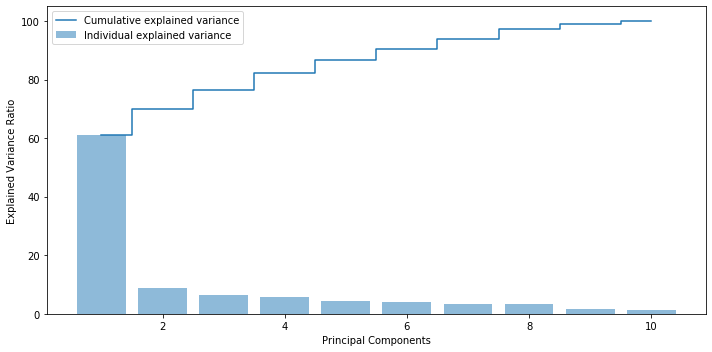

In [180]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [212]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
array = df1.values
X = array[:,0:7] 
Y = array[:,8]   
test_size = 0.30 
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [214]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)

In [215]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components = 6)
X_spca = scikit_pca.fit_transform(X_train_std)

# Q10 Find correlation between components and features

In [216]:
np.corrcoef(X_spca)

array([[ 1.        ,  0.14671754, -0.74577937, ...,  0.31298815,
        -0.46899089, -0.70846849],
       [ 0.14671754,  1.        , -0.49439534, ...,  0.13119827,
        -0.06879814, -0.35353414],
       [-0.74577937, -0.49439534,  1.        , ..., -0.30147318,
         0.16656898,  0.69250602],
       ...,
       [ 0.31298815,  0.13119827, -0.30147318, ...,  1.        ,
         0.64134406, -0.226784  ],
       [-0.46899089, -0.06879814,  0.16656898, ...,  0.64134406,
         1.        ,  0.35999133],
       [-0.70846849, -0.35353414,  0.69250602, ..., -0.226784  ,
         0.35999133,  1.        ]])

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [188]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pd.read_csv('jokes.csv')
dataset.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [193]:
dataset.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [228]:
ratings = dataset.iloc[:200, 1:]
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [229]:
ratings.shape

(200, 100)

In [235]:
#print(ratings.isnull().sum())

In [230]:
ratings.columns

Index(['Joke1', 'Joke2', 'Joke3', 'Joke4', 'Joke5', 'Joke6', 'Joke7', 'Joke8',
       'Joke9', 'Joke10', 'Joke11', 'Joke12', 'Joke13', 'Joke14', 'Joke15',
       'Joke16', 'Joke17', 'Joke18', 'Joke19', 'Joke20', 'Joke21', 'Joke22',
       'Joke23', 'Joke24', 'Joke25', 'Joke26', 'Joke27', 'Joke28', 'Joke29',
       'Joke30', 'Joke31', 'Joke32', 'Joke33', 'Joke34', 'Joke35', 'Joke36',
       'Joke37', 'Joke38', 'Joke39', 'Joke40', 'Joke41', 'Joke42', 'Joke43',
       'Joke44', 'Joke45', 'Joke46', 'Joke47', 'Joke48', 'Joke49', 'Joke50',
       'Joke51', 'Joke52', 'Joke53', 'Joke54', 'Joke55', 'Joke56', 'Joke57',
       'Joke58', 'Joke59', 'Joke60', 'Joke61', 'Joke62', 'Joke63', 'Joke64',
       'Joke65', 'Joke66', 'Joke67', 'Joke68', 'Joke69', 'Joke70', 'Joke71',
       'Joke72', 'Joke73', 'Joke74', 'Joke75', 'Joke76', 'Joke77', 'Joke78',
       'Joke79', 'Joke80', 'Joke81', 'Joke82', 'Joke83', 'Joke84', 'Joke85',
       'Joke86', 'Joke87', 'Joke88', 'Joke89', 'Joke90', 'Joke91', 'Joke92'

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [231]:
ratings.replace(99.00, 0, inplace=True)
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [232]:
ratings_diff = ratings.mean()
ratings_diff.head()

Joke1    0.53005
Joke2    0.59390
Joke3    0.23765
Joke4   -0.70100
Joke5   -0.03790
dtype: float64

In [233]:

ratings_diff.sort_values( ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64